In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('movie_metadata1.csv')

In [5]:
cols=['num_critic_for_reviews','duration','gross','budget','num_user_for_reviews','imdb_score']

In [7]:
subset=df[cols]

In [8]:
from sklearn.cluster import KMeans

In [28]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(subset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
dataset=subset[:]
dataset['Group']=kmeans.labels_

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
len(dataset)

5043

In [31]:
dataset['Group'].value_counts()

0    3746
3    1080
4     212
2       4
1       1
Name: Group, dtype: int64

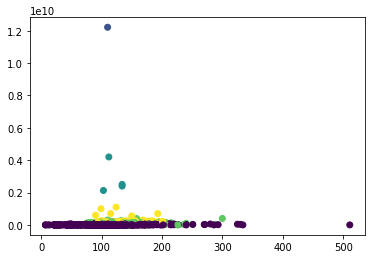

In [35]:
import matplotlib.pyplot as plt
plt.scatter(dataset['duration'],dataset['budget'],c=dataset['Group'])
plt.show()

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca=PCA(n_components=6)

In [39]:
pca.fit(subset)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca.explained_variance_

array([3.85488115e+16, 4.13209768e+15, 9.63243685e+04, 8.34935734e+03,
       5.65289428e+02, 1.09253171e+00])

In [47]:
import numpy as np


array([0.903186, 0.096814, 0.      , 0.      , 0.      , 0.      ])

In [51]:
pd.DataFrame(pca.explained_variance_ratio_).round(20)

,0
0,9.031863e-01
1,9.681372e-02
2,2.256849e-12
3,1.956228e-13
4,1.324455e-14
5,2.560000e-17


In [53]:
new_Data=pca.transform(subset)

In [65]:
 col_names=list( map ( lambda x: "PC"+ str(x)  , list(range(1,7))  ))

In [67]:
PCATransformed_data=pd.DataFrame(new_Data,columns=col_names)

In [68]:
subset.head(2)

,num_critic_for_reviews,duration,gross,budget,num_user_for_reviews,imdb_score
0,723,178,760505847,237000000,3054,7.9
1,302,169,309404152,300000000,1238,7.1


In [69]:
PCATransformed_data.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6
0,2.338353e+08,7.105922e+08,316.370931,173.763109,-4.131940,0.667674
1,2.761596e+08,2.570832e+08,27.962150,113.498634,35.183874,0.258277


In [70]:
import seaborn as sns

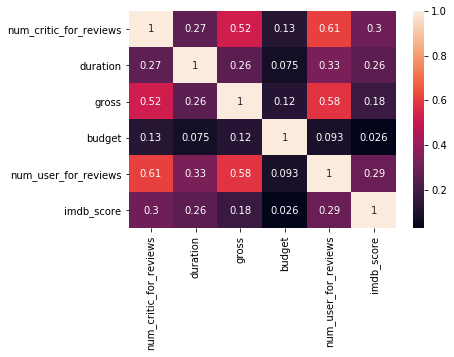

In [71]:
sns.heatmap(subset.corr(),annot=True)

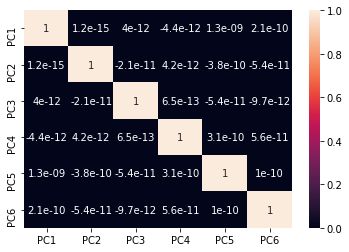

In [72]:
sns.heatmap(PCATransformed_data.corr(),annot=True)

In [74]:
for pc,each in enumerate(pca.explained_variance_ratio_,1):
    print (pc,each)

1 0.9031862778646154
2 0.09681372213291883
3 2.256849031508044e-12
4 1.9562276204123445e-13
5 1.3244549823444882e-14
6 2.5597667257478887e-17


In [76]:
np.cumsum(pca.explained_variance_ratio_)

array([0.90318628, 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [77]:
0.9031*100

90.31

In [78]:
0.0968*100

9.68

In [79]:
90.31+9.68

99.99000000000001

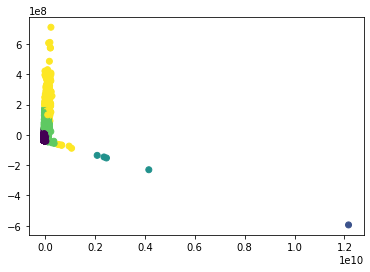

In [83]:
import matplotlib.pyplot as plt
plt.scatter(PCATransformed_data['PC1'],PCATransformed_data['PC2'],c=dataset['Group'])
plt.show()

In [84]:
subsetPCA=PCATransformed_data[['PC1','PC2']]

In [85]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(subsetPCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [86]:
kmeans.labels_

array([4, 4, 4, ..., 0, 0, 0], dtype=int32)

In [87]:
dataset_PCA=subsetPCA[:]
dataset_PCA['Group']=kmeans.labels_

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
dataset_PCA.head()

,PC1,PC2,Group
0,2.338353e+08,7.105922e+08,4
1,2.761596e+08,2.570832e+08,4
2,2.162220e+08,1.503802e+08,4
3,2.325499e+08,3.979492e+08,4
4,-3.766305e+07,-3.829146e+07,0


In [89]:
dataset.head()

,num_critic_for_reviews,duration,gross,budget,num_user_for_reviews,imdb_score,Group
0,723,178,760505847,237000000,3054,7.9,4
1,302,169,309404152,300000000,1238,7.1,4
2,602,148,200074175,245000000,994,6.8,4
3,813,164,448130642,250000000,2701,8.5,4
4,49,49,49,49,49,7.1,0


In [92]:
len(dataset['Group']-dataset_PCA['Group']==0)

5043